 IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns


IMPORT DATASETS

In [6]:
employee_salary = pd.read_csv("Employee_Salary.csv")

In [7]:
employee_salary.head()

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [8]:
employee_salary.tail()

,Years of Experience,Salary
1995,19.178575,421534.6910
1996,19.254499,430478.0265
1997,19.353369,438090.8454
1998,19.842520,482242.1608
1999,20.000000,500000.0000


In [9]:
employee_salary.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


In [10]:
employee_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  2000 non-null   float64
 1   Salary               2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


VISUALISE DATASET

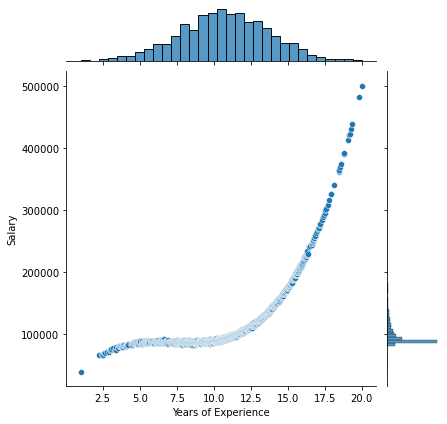

In [11]:
sns.jointplot(x="Years of Experience", y="Salary", data=employee_salary)

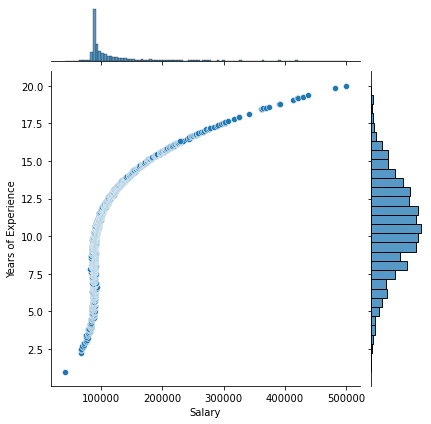

In [12]:
sns.jointplot(x="Salary", y="Years of Experience", data=employee_salary)

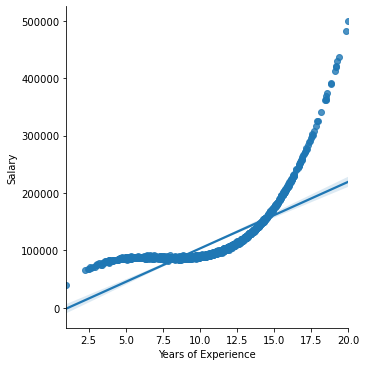

In [13]:
sns.lmplot(x="Years of Experience", y="Salary", data=employee_salary)

CREATING TRAINING AND TEST DATA

In [15]:
X = employee_salary[["Years of Experience"]]

In [16]:
y = employee_salary["Salary"]

In [18]:
# we are using the entire dataset for training only 
X_train = X
y_train = y

Try linear regression. Model Training

In [19]:
y_train.shape

(2000,)

In [21]:
X_train.shape

(2000, 1)

In [24]:
from sklearn.linear_model import LinearRegression

In [26]:
regressor = LinearRegression(fit_intercept=True)

In [27]:
regressor.fit(X_train, y_train)

LinearRegression()

In [28]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [11640.22916165]
Linear Model Coefficient (b):  -13063.099315186904


Visualize the results

Text(0.5, 1.0, 'Salary vs. Years of Experience (Training dataset)')

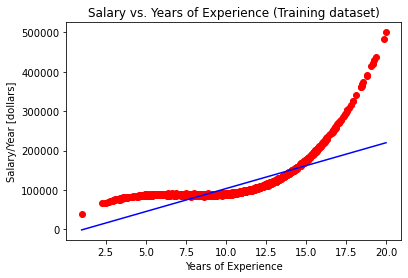

In [33]:
plot.scatter(X_train, y_train, color="r")
plot.plot(X_train, regressor.predict(X_train), color="b")
plot.ylabel('Salary/Year [dollars]')
plot.xlabel('Years of Experience')
plot.title('Salary vs. Years of Experience (Training dataset)')

The above line does not fit all the data features. Try Polynomial regression

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=2)

In [39]:
X_columns = poly_regressor.fit_transform(X_train)

In [40]:
X_columns

array([[  1.        ,   1.        ,   1.        ],
       [  1.        ,   2.25794198,   5.09830199],
       [  1.        ,   2.45087546,   6.00679053],
       ...,
       [  1.        ,  19.35336879, 374.55288352],
       [  1.        ,  19.84251968, 393.72558725],
       [  1.        ,  20.        , 400.        ]])

In [43]:
regressor = LinearRegression()
regressor.fit(X_columns, y_train)

LinearRegression()

In [44]:
print('Model Coefficients: ', regressor.coef_)

Model Coefficients:  [     0.         -33106.32895617   2095.78613853]


Visualize the results

In [45]:
X_train.shape

(2000, 1)

In [47]:
y_predict = regressor.predict(poly_regressor.fit_transform(X_train))

In [48]:
y_predict.shape

(2000,)

Text(0.5, 1.0, 'Salary vs. Years of Experience (Training dataset)')

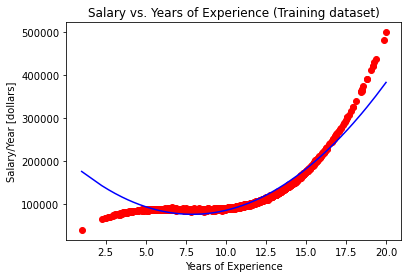

In [50]:
plot.scatter(X_train, y_train, color = 'red')
plot.plot(X_train, y_predict, color = 'blue')
plot.ylabel('Salary/Year [dollars]')
plot.xlabel('Years of Experience')
plot.title('Salary vs. Years of Experience (Training dataset)')